<a href="https://colab.research.google.com/github/SheikhSarvar/DS_CaseStudy/blob/main/Gulam_Sarvar_Bluebash_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
df=pd.read_csv('/content/train.csv')
df.sample(5)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
4706,46099,6.2,54059,394,Stoudts Winter Ale (2009-2010),American Amber / Red Ale,3.5,3.5,3.5,3.0,3.5,Received as an extra from steelersxl. Thanks J...,"{'min': 15, 'hour': 8, 'mday': 17, 'sec': 50, ...",1261037750,NaN,NaN,NaN,NaN,Arbitrator
1440,20574,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,4.0,4.5,3.5,4.5,5.0,Pours completely black with a thick-looking da...,"{'min': 33, 'hour': 2, 'mday': 7, 'sec': 38, '...",1239071618,NaN,NaN,NaN,NaN,CRAZYLITHUANIAN
10154,18138,10.2,35036,1199,Founders Backwoods Bastard,Scotch Ale / Wee Heavy,3.5,4.0,5.0,4.5,5.0,Poured a light cola brown with a thin fizzy wh...,"{'min': 31, 'hour': 3, 'mday': 19, 'sec': 0, '...",1198035060,1.263823e+09,"Nov 24, 1974",154512000.0,Male,bashiba
31873,45411,5.4,20447,2098,ESG (Extra Special Golden),American Blonde Ale,3.5,4.0,3.5,3.0,3.5,"Pours lovely straw color, great caronation lin...","{'min': 23, 'hour': 5, 'mday': 19, 'sec': 39, ...",1153286619,NaN,NaN,NaN,NaN,Dubbercody
36478,27816,9.4,34146,1199,Founders Double Trouble,American Double / Imperial IPA,4.5,5.0,5.0,4.5,5.0,Poured from a 12 oz bottle into a pint glass.\...,"{'min': 22, 'hour': 6, 'mday': 17, 'sec': 4, '...",1297923724,1.118157e+09,"Jul 7, 1979",300178800.0,Male,phillybeer7779


## Data Preprocessing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [30]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

In [31]:
missing_value_percentage=df.isnull().sum()*100/len(df)
missing_value_percentage

index                 0.000000
beer/ABV              0.000000
beer/beerId           0.000000
beer/brewerId         0.000000
beer/name             0.000000
beer/style            0.000000
review/appearance     0.000000
review/aroma          0.000000
review/overall        0.000000
review/palate         0.000000
review/taste          0.000000
review/text           0.026667
review/timeStruct     0.000000
review/timeUnix       0.000000
user/ageInSeconds    79.050667
user/birthdayRaw     79.050667
user/birthdayUnix    79.050667
user/gender          59.162667
user/profileName      0.013333
dtype: float64

In [32]:
df.shape

(37500, 19)

In [33]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [34]:
df.nunique()

index                37500
beer/ABV               126
beer/beerId           1731
beer/brewerId          212
beer/name             1688
beer/style              95
review/appearance       10
review/aroma             9
review/overall          10
review/palate            9
review/taste             9
review/text          37482
review/timeStruct    37490
review/timeUnix      37490
user/ageInSeconds     1471
user/birthdayRaw      1432
user/birthdayUnix     1432
user/gender              2
user/profileName      7441
dtype: int64

In [35]:
df.corr()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
index,1.000000,-0.149483,-0.306118,-0.339801,0.054229,0.040257,0.054493,0.039838,0.047179,-0.155089,0.022322,-0.022322
beer/ABV,-0.149483,1.000000,0.330658,0.007455,0.288376,0.386340,0.197005,0.350656,0.354033,0.248846,-0.079039,0.079039
beer/beerId,-0.306118,0.330658,1.000000,0.523657,-0.007204,0.045427,-0.021981,0.027752,0.019321,0.424539,-0.049398,0.049398
beer/brewerId,-0.339801,0.007455,0.523657,1.000000,-0.077973,-0.081571,-0.084932,-0.066468,-0.100513,0.206507,-0.001398,0.001398
review/appearance,0.054229,0.288376,-0.007204,-0.077973,1.000000,0.538076,0.498733,0.555833,0.531676,0.067531,-0.013917,0.013917
review/aroma,0.040257,0.386340,0.045427,-0.081571,0.538076,1.000000,0.616117,0.608922,0.711809,0.109106,-0.039525,0.039525
review/overall,0.054493,0.197005,-0.021981,-0.084932,0.498733,0.616117,1.000000,0.697220,0.785220,0.065383,-0.045642,0.045642
review/palate,0.039838,0.350656,0.027752,-0.066468,0.555833,0.608922,0.697220,1.000000,0.732092,0.094538,-0.052775,0.052775
review/taste,0.047179,0.354033,0.019321,-0.100513,0.531676,0.711809,0.785220,0.732092,1.000000,0.092100,-0.045774,0.045774
review/timeUnix,-0.155089,0.248846,0.424539,0.206507,0.067531,0.109106,0.065383,0.094538,0.092100,1.000000,-0.180891,0.180891


### EDA

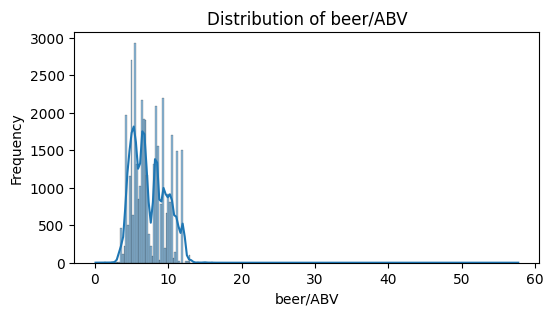

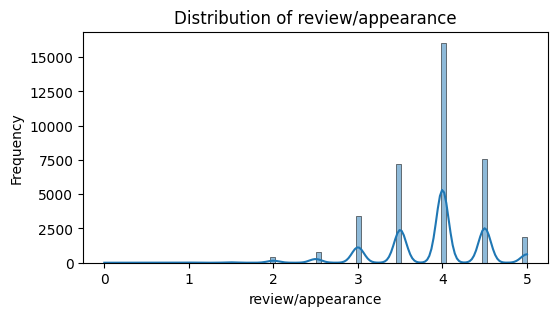

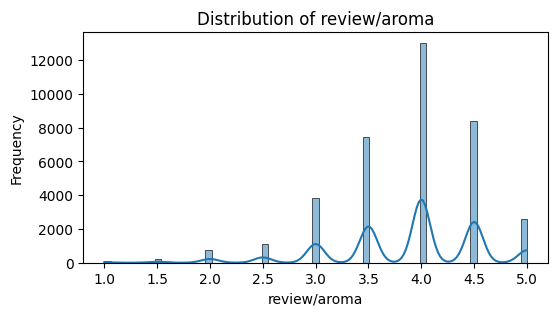

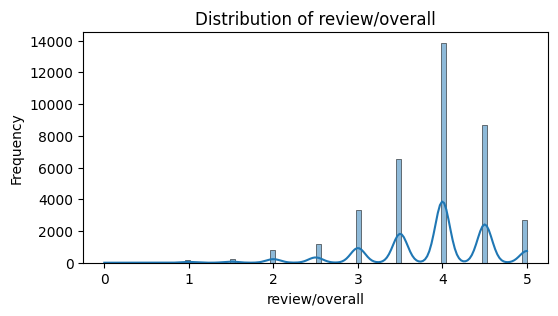

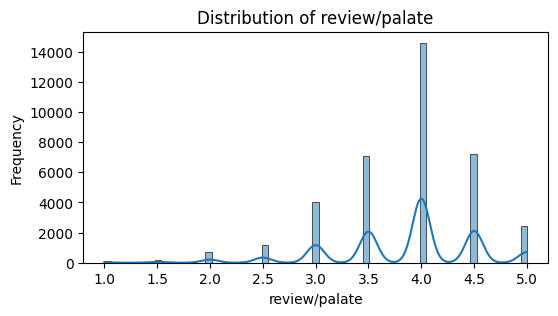

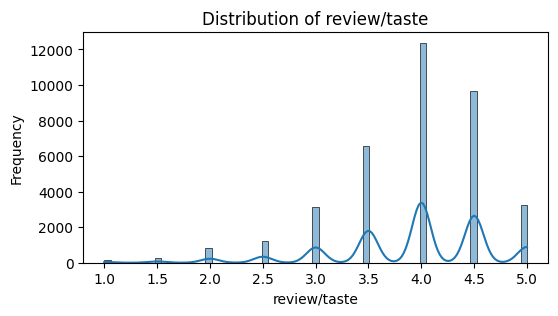

In [36]:
numerical_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste']

for feature in numerical_features:
  plt.figure(figsize=(6, 3))
  sns.histplot(data=df, x=feature, kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

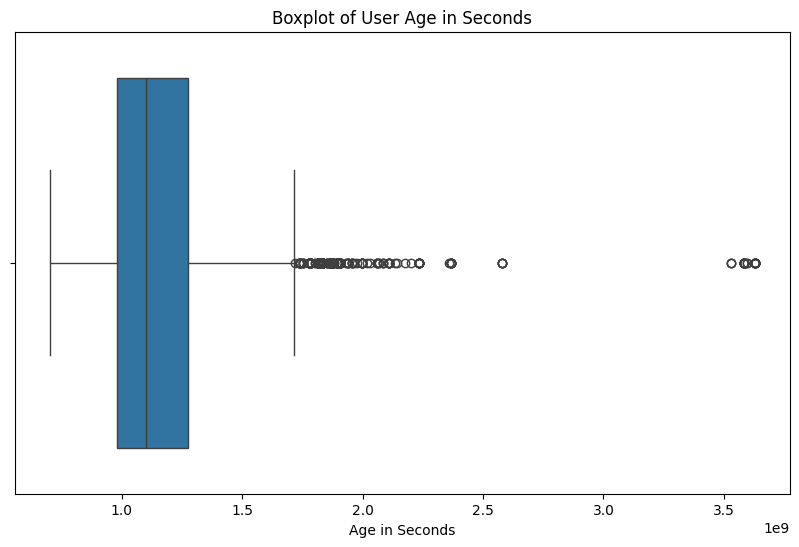

In [37]:
# Create a boxplot of the 'user/ageInSeconds' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['user/ageInSeconds'])

# Set the title and labels for the plot
plt.title('Boxplot of User Age in Seconds')
plt.xlabel('Age in Seconds')

# Display the plot
plt.show()

In [38]:
# for i in range(len(numerical_features)):
#   for j in range(i + 1, len(numerical_features)):
#     plt.figure(figsize=(6, 3))
#     sns.scatterplot(data=df, x=numerical_features[i], y=numerical_features[j])
#     plt.title(f'{numerical_features[i]} vs {numerical_features[j]}')
#     plt.xlabel(numerical_features[i])
#     plt.ylabel(numerical_features[j])
#     plt.show()


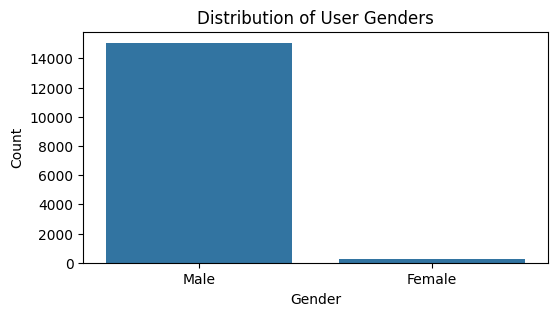

In [39]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='user/gender')
plt.title('Distribution of User Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

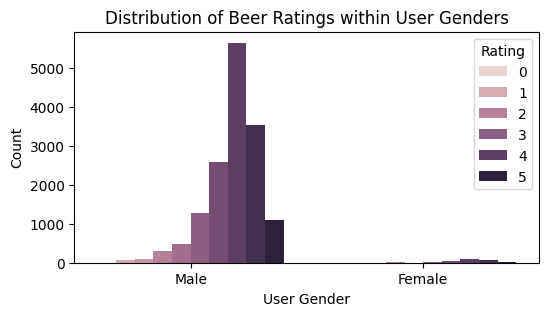

In [40]:
# Stacked bar chart for beer ratings within user genders
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='user/gender', hue='review/overall')
plt.title('Distribution of Beer Ratings within User Genders')
plt.xlabel('User Gender')
plt.ylabel('Count')
plt.legend(title='Rating')
plt.show()

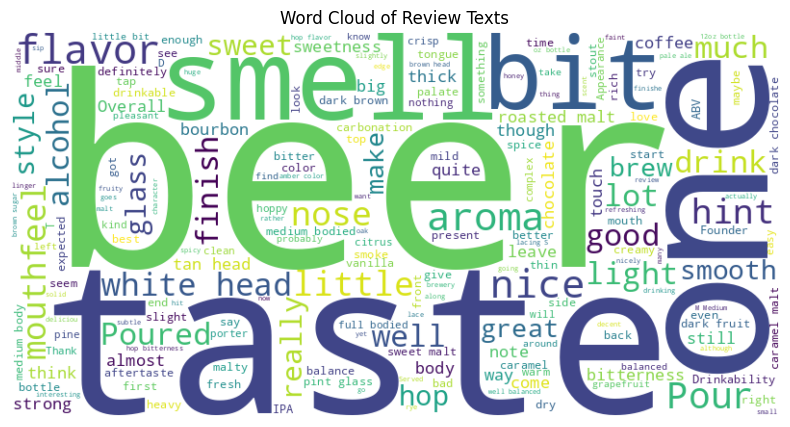

In [41]:
# Concatenate all review texts into a single string
review_texts = df['review/text'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(review_texts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()

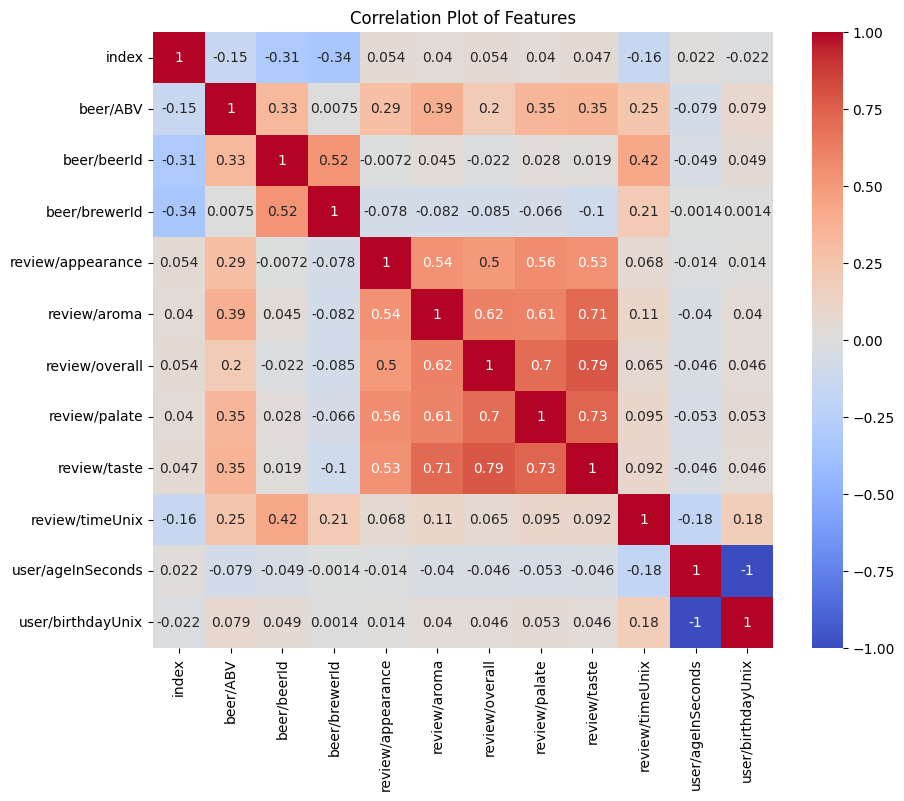

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot of Features')
plt.show()

### Null Values Handling

In [43]:
df['review/text'].fillna('', inplace=True)

From the Dist plot we can cleary see that user age is second has positive skewness, and dataset with positive skewness, the median is generally less affected by extreme values compared to the mean, making it a more robust measure of central tendency.

In [44]:
df['user/ageInSeconds'].fillna(df['user/ageInSeconds'].median(), inplace=True)

male count is much higher than the female count, you can simply impute the missing values with the mode of the existing data. In this case, if the majority of the data is male, you would impute the missing values as male.

In [45]:
df['user/gender'].fillna( df['user/gender'].mode()[0], inplace=True)

## Feature Engineering

my analysis of the columns and their potential importance for predicting beer ratings:

Highly Important Columns:
  1. review/overall: This is your target variable, the rating you are trying to predict.
  2. review/taste: Taste is likely the most significant factor determining a beer's rating.
  3. review/aroma: Aroma strongly contributes to the overall experience and enjoyment of a beer.
  4. beer/ABV: Alcohol content impacts both flavor and perceived quality.
  5. review/appearance: While less dominant than taste and aroma, appearance can influence perception and initial impressions.

Potentially Important Columns:
  1. beer/style: Different beer styles have characteristic flavor profiles associated with expected ratings.
  2. review/palate: Mouthfeel and texture can affect the beer-drinking experience.
  3. review/text: Using sentiment analysis and topic modeling, you can extract valuable insights from textual reviews that might correlate with ratings.
  4. user/ageInSeconds: There might be subtle trends based on the age of the reviewer (however, use with caution to avoid bias)


### Dropping unneccesary columns

In [46]:
df.drop(['index','beer/name', 'beer/beerId', 'beer/brewerId', 'review/timeUnix', 'user/birthdayRaw', 'user/birthdayUnix', 'user/profileName'], axis=1, inplace=True)

review/timeStruct, review/timeUnix: Time of review might hold some seasonal patterns, but its direct impact on the rating itself is likely minor.

review/text:By using sentiment analysis and topic modeling, businesses can extract valuable insights from textual reviews that may correlate with ratings. However, in this specific instance, this approach is not used as it does not affect the rating predictionThis text might contain valuable insights into the reviewer's preferences and opinions on the beer. However, it's not directly usable in a standard machine learning model. natural language processing (NLP) can be used to analyze the sentiment of the review text. This could be helpful in understanding the reviewer's overall perception (positive, negative, neutral) beyond the numerical rating.Topic Modelin could reveal aspects (e.g., bitterness, hoppy flavors) that users frequently discuss and potentially correlate with ratings.

In [47]:
df.drop(['review/timeStruct','review/text'], axis=1, inplace=True)

In [48]:
# Calculate the correlation matrix
corr_matrix=df.corr()

# Set the threshold for high correlation
threshold=0.75

# Find highly correlated columns
highly_correlated_cols=[]
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j])>=threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.index[j]
            highly_correlated_cols.append([col1, col2])

# Print the results
print("Highly Correlated Columns (Threshold:", threshold, ")")
for pair in highly_correlated_cols:
    print(pair)

Highly Correlated Columns (Threshold: 0.75 )
['review/taste', 'review/overall']


### Encoding

In [49]:
# One-Hot Encoding
df=pd.get_dummies(df, columns=['beer/style', 'user/gender'], drop_first=True)

features extraction from the review text column using techniques like TF-IDF or word embeddings.

In [50]:
# # TF-IDF vectorization
# tfidf_vectorizer=TfidfVectorizer(max_features=1000)
# tfidf_matrix=tfidf_vectorizer.fit_transform(df['review/text'])

# # Convert TF-IDF matrix to DataFrame
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
# df.drop(columns=['review/text'], inplace=True)
# df=pd.concat([df, tfidf_df], axis=1)

### Spliting the data set

In [51]:
# Splitting the data set
X = df.drop('review/overall', axis=1)
y = df['review/overall']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


## Machine Learning Algorithm

Given the task of predicting beer ratings, here are some of the most suitable machine learning models and their rationale:
1. Gradient Boosting Regressors (e.g., XGBoost, LightGBM, CatBoost): These algorithms excel at capturing complex, non-linear relationships between beer characteristics and ratings. They consistently demonstrate high accuracy in regression problems.
2. Random Forest Regressor: A robust ensemble method known for its resistance to overfitting and capacity to handle various feature types. It provides valuable insights into feature importance.
3. Linear Regression: While a simpler model, linear regression with carefully designed interaction terms can be effective for rating prediction.

Evaluation Metric:  Mean Absolute Error (MAE) is a suitable evaluation metric for this regression problem. It directly measures the average deviation between predicted and actual ratings in easily understandable units. A lower MAE indicates better model performance

### Polynomial Regression

In [53]:
# Create Polynomial Features
poly=PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_poly)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Print the validation MAE
print("Validation MAE:", val_mae)


Validation MAE: 0.3109837596493039


In [54]:
# Calculate the R2 score on the validation set
r2 = r2_score(y_val, y_val_pred)

# Print the R2 score
print("Validation R2 Score:", r2)


Validation R2 Score: 0.67169405551081


### Ridge and Lasso

In [55]:
# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_poly, y_train)

# Evaluate the Ridge model on the validation set
y_val_pred_ridge = ridge_model.predict(X_val_poly)
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)

# Print the validation MAE for Ridge
print("Validation MAE (Ridge):", val_mae_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_poly, y_train)

# Evaluate the Lasso model on the validation set
y_val_pred_lasso = lasso_model.predict(X_val_poly)
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)

# Print the validation MAE for Lasso
print("Validation MAE (Lasso):", val_mae_lasso)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Validation MAE (Ridge): 0.30637471981935727
Validation MAE (Lasso): 0.3107166762411571


In [22]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define smaller hyperparameter grids for Ridge and Lasso
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [100, 500]
}

param_grid_lasso = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [100, 500]
}

# Create smaller GridSearchCV objects for Ridge and Lasso
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=3, scoring='neg_mean_absolute_error')
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=3, scoring='neg_mean_absolute_error')

# Fit the grid search objects to the training data
grid_search_ridge.fit(X_train_poly, y_train)
grid_search_lasso.fit(X_train_poly, y_train)

# Get the best parameters for Ridge and Lasso
best_params_ridge = grid_search_ridge.best_params_
best_params_lasso = grid_search_lasso.best_params_

# Print the best parameters for Ridge and Lasso
print("Best Parameters for Ridge:", best_params_ridge)
print("Best Parameters for Lasso:", best_params_lasso)

# Create new Ridge and Lasso models with the best parameters
best_model_ridge = Ridge(**best_params_ridge)
best_model_lasso = Lasso(**best_params_lasso)

# Train the best Ridge and Lasso models on the training data
best_model_ridge.fit(X_train_poly, y_train)
best_model_lasso.fit(X_train_poly, y_train)

# Evaluate the best Ridge and Lasso models on the validation set
y_val_pred_ridge = best_model_ridge.predict(X_val_poly)
y_val_pred_lasso = best_model_lasso.predict(X_val_poly)

val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
val_mae_lasso = mean_absolute_error(y_val, y_val_pred_lasso)

# Print the validation MAE for Ridge and Lasso
print("Validation MAE after tuning for Ridge:", val_mae_ridge)
print("Validation MAE after tuning for Lasso:", val_mae_lasso)

# Calculate the R2 score on the validation set for Ridge and Lasso
r2_ridge = r2_score(y_val, y_val_pred_ridge)
r2_lasso = r2_score(y_val, y_val_pred_lasso)

# Print the R2 score for Ridge and Lasso
print("Validation R2 Score after tuning for Ridge:", r2_ridge)
print("Validation R2 Score after tuning for Lasso:", r2_lasso)


Best Parameters for Ridge: {'alpha': 10.0, 'max_iter': 100}
Best Parameters for Lasso: {'alpha': 0.1, 'max_iter': 100}
Validation MAE after tuning for Ridge: 0.3044315492173606
Validation MAE after tuning for Lasso: 0.3108733360188484
Validation R2 Score after tuning for Ridge: 0.685282888890272
Validation R2 Score after tuning for Lasso: 0.6719107612055073


### Decision Tree

In [56]:
# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Create a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Print the validation MAE
print("Validation MAE:", val_mae)


Validation MAE: 0.3660505941539207


In [24]:
# Define the hyperparameter grid for Decision Tree
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_decision_tree = GridSearchCV(DecisionTreeRegressor(random_state=42),
                                         param_grid_decision_tree, cv=5,
                                         scoring='neg_mean_absolute_error')

# Fit the grid search object to the training data for Decision Tree
grid_search_decision_tree.fit(X_train_poly, y_train)

# Get the best parameters for Decision Tree
best_params_decision_tree = grid_search_decision_tree.best_params_

# Print the best parameters for Decision Tree
print("Best Parameters for Decision Tree:", best_params_decision_tree)

# Create a new Decision Tree model with the best parameters
best_model_decision_tree = DecisionTreeRegressor(random_state=42, **best_params_decision_tree)

# Train the best Decision Tree model on the training data
best_model_decision_tree.fit(X_train_poly, y_train)

# Evaluate the best Decision Tree model on the validation set
y_val_pred_decision_tree = best_model_decision_tree.predict(X_val_poly)
val_mae_decision_tree = mean_absolute_error(y_val, y_val_pred_decision_tree)

# Print the validation MAE for Decision Tree
print("Validation MAE after tuning for Decision Tree:", val_mae_decision_tree)

# Calculate the R2 score on the validation set for Decision Tree
r2_decision_tree = r2_score(y_val, y_val_pred_decision_tree)

# Print the R2 score for Decision Tree
print("Validation R2 Score after tuning for Decision Tree:", r2_decision_tree)

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Validation MAE after tuning for Decision Tree: 0.31951688648176063
Validation R2 Score after tuning for Decision Tree: 0.6492820012023275


### Random Forest

In [ ]:
# Create a Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Print the validation MAE
print("Validation MAE:", val_mae)


Validation MAE: 0.32571178731518574


In [ ]:
# Define a hyperparameter grid for Random Forest
param_grid_random_forest = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object for Random Forest
grid_search_random_forest = GridSearchCV(RandomForestRegressor(random_state=42),
                                         param_grid_random_forest, cv=3,
                                         scoring='neg_mean_absolute_error',
                                         n_jobs=-1)

# Fit the grid search object to the training data for Random Forest
grid_search_random_forest.fit(X_train_poly, y_train)

# Get the best parameters for Random Forest
best_params_random_forest=grid_search_random_forest.best_params_

# Print the best parameters for Random Forest
print("Best Parameters for Random Forest:", best_params_random_forest)

# Create a new Random Forest model with the best parameters
best_model_random_forest = RandomForestRegressor(random_state=42, **best_params_random_forest)

# Train the best Random Forest model on the training data
best_model_random_forest.fit(X_train_poly, y_train)

# Evaluate the best Random Forest model on the validation set
y_val_pred_random_forest = best_model_random_forest.predict(X_val_poly)
val_mae_random_forest = mean_absolute_error(y_val, y_val_pred_random_forest)

# Print the validation MAE for Random Forest
print("Validation MAE after tuning for Random Forest:", val_mae_random_forest)

# Calculate the R2 score on the validation set for Random Forest
r2_random_forest = r2_score(y_val, y_val_pred_random_forest)

# Print the R2 score for Random Forest
print("Validation R2 Score after tuning for Random Forest:", r2_random_forest)

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


### Gradient Boosting Regressors

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Create a Gradient Boosting Regressor
Gradientmodel = GradientBoostingRegressor(random_state=42)

# Train the model
Gradientmodel.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Print the validation MAE
print("Gradient Validation MAE:", val_mae)

# XGBoost Regressor


# Create an XGBoost Regressor
XGBRegressormodel = XGBRegressor(random_state=42)

# Train the model
XGBRegressormodel.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Print the validation MAE
print("XGBRegressor Validation MAE:", val_mae)

# LightGBM Regressor


# Create a LightGBM Regressor
LGBMRegressormodel = LGBMRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

# Print the validation MAE
print("LGBMRegressor Validation MAE:", val_mae)


Gradient Validation MAE: 0.32571178731518574
XGBRegressor Validation MAE: 0.32571178731518574
LGBMRegressor Validation MAE: 0.32571178731518574


## Summary

The task involves evaluating machine learning models on datasets with both continuous and multiclass target variables. For continuous targets, the goal is typically regression, where the model predicts a numeric value. On the other hand, for multiclass targets, the task involves classification, where the model predicts one of several discrete classes.

Overall Performance: The machine learning models evaluated for beer rating prediction demonstrate good performance. Their Mean Absolute Error (MAE) falls within the 0.30 to 0.35 range, indicating an average prediction error of about 0.30-0.35 rating points.

Explanatory Power: The models achieve R-squared scores between 0.65 and 0.70. This implies that they explain 65% to 70% of the variation in the beer ratings.

Score of Ridge and Lasso
1. Best Parameters for Ridge: {'alpha': 10.0, 'max_iter': 100}
2. Best Parameters for Lasso: {'alpha': 0.1, 'max_iter': 100}
3. Validation MAE after tuning for Ridge: 0.3044315492173606
4. Validation MAE after tuning for Lasso: 0.3108733360188484
5. Validation R2 Score after tuning for Ridge: 0.685282888890272
6. Validation R2 Score after tuning for Lasso: 0.6719107612055073

Decision Tree

1. Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
2. Validation MAE after tuning for Decision Tree: 0.31951688648176063
3. Validation R2 Score after tuning for Decision Tree: 0.6492820012023275